<a href="https://colab.research.google.com/github/aleksripe-prog/DataScienceChallengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


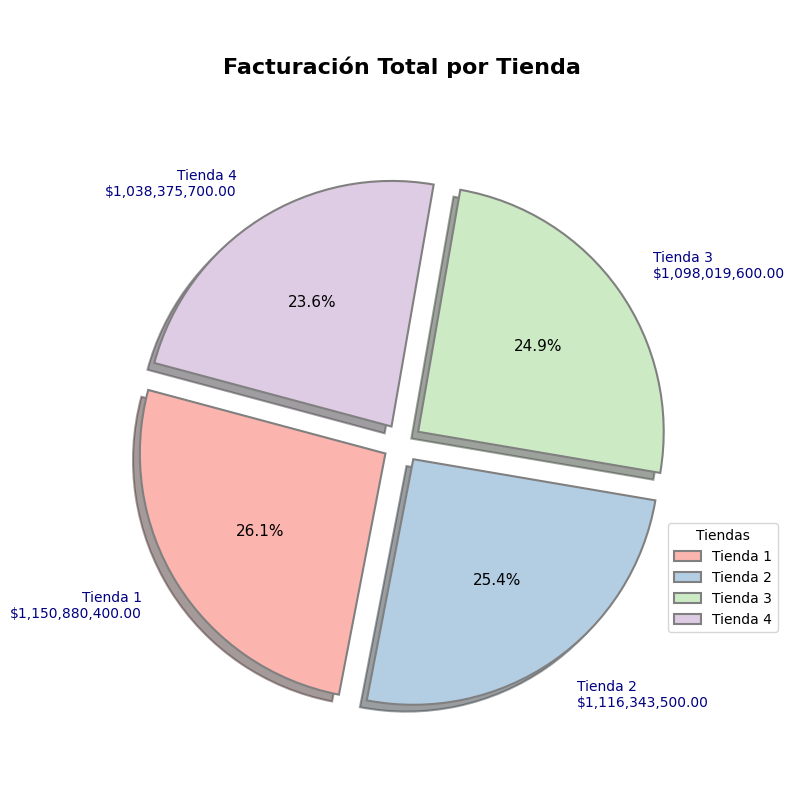

In [3]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive, files

# Montamos Google Drive
drive.mount('/content/drive')

# Diccionario con las URLs de las tiendas
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Leemos los CSV y calculamos la facturación total por tienda
facturacion_total = {}

for tienda, url in urls.items():
    df = pd.read_csv(url)
    facturacion_total[tienda] = df["Precio"].sum()

# Convertimos el diccionario en una Serie ordenada
facturacion_total = pd.Series(facturacion_total).sort_values(ascending=False)
print
# Función para formatear los valores como dinero
def formato_personalizado(valor):
    return f"${valor:,.2f}"

# Extraemos etiquetas y valores
labels = facturacion_total.index
sizes = facturacion_total.values
porcentajes = sizes / sizes.sum() * 100

# Definimos colores y separación
colors = plt.cm.Pastel1.colors
explode = [0.08] * len(labels)

# Se crea el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Creamos el gráfico de pastel
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',            # Porcentaje dentro de cada porción
    wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5},  # Definimos el borde
    explode=explode,
    colors=colors,
    startangle=165,
    shadow=True,
    textprops=dict(color='black', fontsize=11)
)

# Añadimos etiquetas con nombre de tienda e importe total
for i, wedge in enumerate(wedges):      # Recorremos cada pieza del pie (i = índice)
    angulo = (wedge.theta2 + wedge.theta1) / 2.0    # Ubica la etiqueta en el centro angular de c/pieza. Angulo Medio de la Pieza = (Ang.Ini + Ang.Fin)/2
    x = np.cos(np.deg2rad(angulo))      # coordenada horizontal (eje X). Convierte el ángulo de grados a radianes
    y = np.sin(np.deg2rad(angulo))      # coordenada vertical (eje Y). Convierte el ángulo de grados a radianes
    ha = "left" if x > 0 else "right"   # alineación horizontal. Alínea el texto a la izquierda o derecha, dependiendo de si está en el lado izquierdo o derecho del gráfico (basado en la coordenada X).
    ax.text(x * 1.25, y * 1.25,         # aleja la etiqueta del centro, para que no quede sobre la porción sino más afuera
            f"{labels[i]}\n{formato_personalizado(sizes[i])}",  # muestra el nombre de la tienda y el valor debajo.
            ha=ha, va='center', color='navy', fontsize=10)

# Añadimos una leyenda con colores de tienda
ax.legend(wedges, labels, title="Tiendas", loc="center left", bbox_to_anchor=(0.95, -0.2, 0.5, 1))

# Título y formato final
plt.title("\n\nFacturación Total por Tienda\n", fontsize=16, fontweight='bold')
plt.axis('equal')  # Asegura forma circular
plt.tight_layout()

# También puedes descargarlo directamente a tu PC
#files.download("/content/drive/MyDrive/facturacion_por_tienda.pdf")

# Mostramos el gráfico en pantalla
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda